## Model Building

In [184]:
library(MASS)
library(glmnet)
library(scales)
library(ggplot2)
library(shiny)

In [185]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")
set.seed(42)

In [186]:
init_data <- read.csv("data/merged_data.csv")[, -1]
init_data$food <- NULL
init_data$manufac <- NULL

# init_data <- init_data[, 1:5]

head(init_data)

,year,month,GEO,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


In [187]:
# data$pop <- rescale(data$pop)
# data$retail <- rescale(data$retail)
# data$oil <- rescale(data$oil)
# data$power <- rescale(data$power)

In [188]:
colnames(init_data)[colnames(init_data) == "GEO"] <- "prov"
head(init_data)

,year,month,prov,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


In [189]:
init_data$prov  <- as.factor(init_data$prov)
init_data$month <- as.factor(init_data$month)
init_data$year <- as.factor(init_data$year)

In [190]:
head(init_data)


,year,month,prov,pop,protests,retail,oil,power
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


## Fitting the Model

In [191]:
model1 <- glm.nb(protests ~., data=init_data, init.theta = 1)

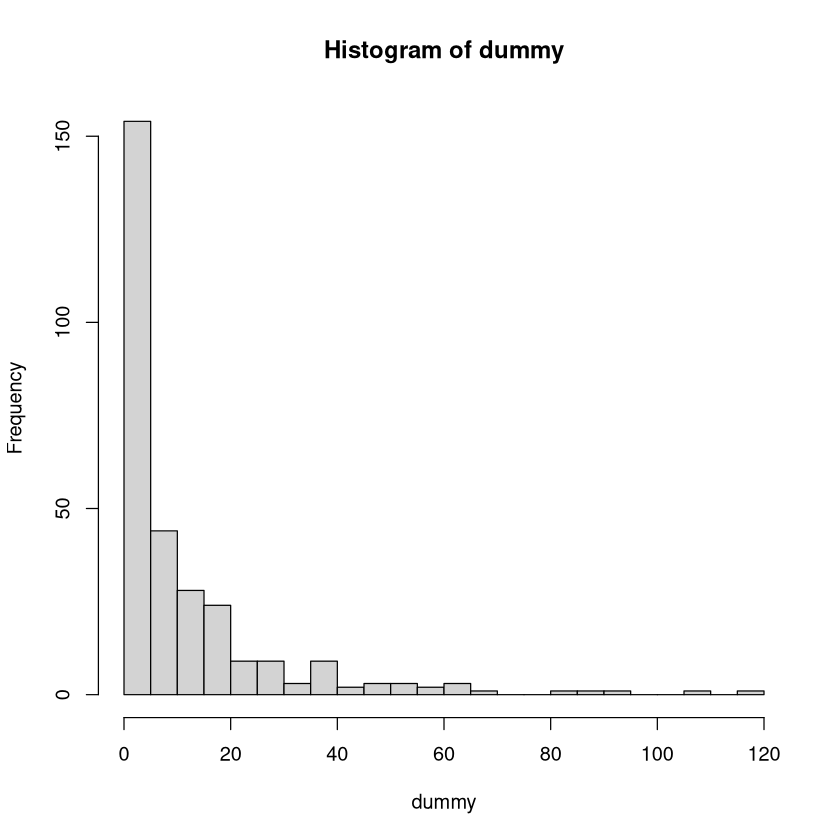

In [192]:
dummy <- rnegbin(fitted(model1), theta = 10.75)
hist(dummy, breaks=25)

In [193]:
anova(model1)

Warning message in anova.negbin(model1):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,298,2368.9063,NA
year,1,1.143289e+00,297,2367.7630,2.849583e-01
month,11,8.988210e+01,286,2277.8809,1.758231e-14
prov,12,1.918190e+03,274,359.6911,0.000000e+00
pop,1,1.223328e+00,273,358.4678,2.687085e-01
retail,1,5.846439e+00,272,352.6213,1.560860e-02
oil,1,1.275936e-01,271,352.4937,7.209403e-01
power,1,4.744238e-04,270,352.4932,9.826224e-01


In [194]:
data <- init_data[, -c(1, 4, 7, 8)]
model <- glm.nb(protests ~., data=data, init.theta = 1)

names(summary(model))
summary(model)

[1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"     "theta"          "SE.theta"       "twologlik"     
[21] NA


Call:
glm.nb(formula = protests ~ ., data = data, init.theta = 10.18063071, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2669  -0.9685  -0.1702   0.5728   3.0399  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.976e+00  1.179e+00   4.222 2.42e-05 ***
monthAugust                   -7.044e-01  1.452e-01  -4.850 1.24e-06 ***
monthDecember                 -6.289e-01  1.798e-01  -3.498 0.000468 ***
monthFebruary                  4.864e-02  1.314e-01   0.370 0.711202    
monthJanuary                  -3.284e-01  1.372e-01  -2.394 0.016659 *  
monthJuly                     -5.533e-01  1.419e-01  -3.900 9.63e-05 ***
monthJune                     -3.512e-01  1.401e-01  -2.507 0.012169 *  
monthMarch                    -1.060e-01  1.337e-01  -0.793 0.427836    
monthMay                      -3.083e-02  1.335e-01  -0.231 0.817414    
monthNovember                 -7.729e-02  1.346

## Bootstrap Methods

### 1. Resampling Bootstrap

In [195]:
resampBoot <- function(df, B) {

    # Get sample size
    n <- nrow(df)
    # Initialize empty dataframe
    params <- c()
    # Initialize progress bar
    bar <- txtProgressBar(min=0, max=B, style=1)
    # Perform B iterations
    for (b in 1:B) {
        # Select a sample of size n
        indices <- sample(1:n, replace = TRUE)
        samp <- df[indices, ]
        # Fit the model with the sample
        boot_model <- glm.nb(protests ~., data=samp, init.theta = 10)
        boot_params <- coef(boot_model)
        params <- rbind(params, boot_params)
        setTxtProgressBar(bar, b)
    }
    close(bar)
    return(params)

}

# boot_models <- resampBoot(data, 5000)

In [196]:
# boot_models <- as.data.frame(boot_models)
# boot_models

In [197]:
# write.csv(boot_models, "data/results/resamp_boot_results.csv")

### 2. Parametric Bootstrap

In [198]:
parametricBoot <- function(X, model, B, err_mean, err_sd, errors) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    # Perform B iterations
    for (b in 1:B) {
        # Get errors
        # errs <- rnorm(n=n, mean=err_mean, sd=1)
        errs <- sample(errors, size=n, replace=TRUE)
        # Get fitted values
        yhat <- fitted(model)
        # Get simulated y
        ystar <- yhat + errs
        # round up negative values
        ystar <- pmax(rep(0, n), ystar)
        # Turn into DataFrame
        sim_data <- data.frame(protests=ystar, X)
        # round to integers
        # sim_data$protests <- round(sim_data$protests)
        
        # Fit the model with the simulated data
        paramboot_model <- glm.nb(protests ~., data=sim_data, init.theta = 5)
        boot_params <- coef(paramboot_model)
        params <- rbind(params, boot_params)
    }
    return(params)
}

In [199]:
model <- glm.nb(protests ~., data=data, init.theta = 1)

In [200]:
X <- data[, c(1,2,4)]
B <- 5000
epsilon <- resid(model)
err_mean <- mean(epsilon)
err_sd <- sd(epsilon)

# suppressWarnings({
#   parametric_models <- parametricBoot(X, model, B, err_mean, err_sd, epsilon)
# })

# parametric_models

In [201]:
# param_results <- as.data.frame(parametric_models)
# param_results

In [202]:
# write.csv(param_results, "data/results/param_boot_results.csv")

In [203]:
class(data$prov)

[1] "factor"

### 3. Smooth Bootstrap

In [204]:
addNoise <- function(X) {

    cols <- colnames(X)
    new_X <- X
    for (col in cols) {
        Xi <- X[, col]
        if (class(data[, col]) != "factor") {
            n <- length(Xi)
            S_sq <- var(Xi)
            noise_var <- S_sq / n
            new_X[, col] <- Xi + rnorm(n=n, mean=0, sd=sqrt(noise_var))
        } else {
            new_X[, col] <- Xi
        }
    }
    return(new_X)
}

In [205]:
smoothBoot <- function(X, y, B, noisefunc) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    
    # Initialize progress bar
    pb <- txtProgressBar(min = 0, max = B, style = 3)
    
    # Perform B iterations
    for (b in 1:B) {
        # Update progress bar
        setTxtProgressBar(pb, b)
        
        # Get new dataset
        new_X <- noisefunc(X)
        new_data <- data.frame(protests=y, new_X)
        
        # Fit the model with the simulated data
        smoothboot_model <- glm.nb(protests ~., data=new_data, init.theta = 5)
        boot_params <- coef(smoothboot_model)
        params <- rbind(params, boot_params)
    }
    
    # Close progress bar
    close(pb)
    
    return(params)
}

In [206]:
X <- data[, c(1,2,4)]
y <- data$protests
B <- 5000
smooth_data <- smoothBoot(X, y, B, addNoise)

  |                                                                      |   0%

  |======================================================================| 100%


In [207]:
smooth_results <- as.data.frame(smooth_data)
head(smooth_results)

,(Intercept),monthAugust,monthDecember,monthFebruary,monthJanuary,monthJuly,monthJune,monthMarch,monthMay,monthNovember,⋯,provNewfoundland and Labrador,provNorthwest Territories,provNova Scotia,provNunavut,provOntario,provPrince Edward Island,provQuebec,provSaskatchewan,provYukon,retail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
boot_params,3.411332,-0.7177051,-0.6480531,0.06143487,-0.3210770,-0.5802266,-0.3985163,-0.09004081,-0.04414388,-0.09862936,⋯,-1.668035,-3.810976,-1.1734855,-3.420045,2.496597,-2.594981,1.0279749,-1.4226696,-2.577871,-7.150367e-08
boot_params.1,3.277708,-0.7176239,-0.6391480,0.07277080,-0.3147501,-0.5574586,-0.3819086,-0.08576057,-0.04541287,-0.10779227,⋯,-1.560807,-3.671845,-1.0674603,-3.303896,2.238579,-2.478139,0.9287324,-1.3187201,-2.455466,-5.549627e-08
boot_params.2,2.694526,-0.7192592,-0.6389254,0.06560224,-0.3144183,-0.5679472,-0.3934821,-0.08143561,-0.05438845,-0.10978499,⋯,-1.036732,-3.093686,-0.5982885,-2.710938,1.098825,-1.905690,0.5009218,-0.8720643,-1.873432,1.467485e-08
boot_params.3,3.886273,-0.6992835,-0.6789964,0.06544552,-0.3145204,-0.5820351,-0.3729310,-0.10087243,-0.04262702,-0.08025947,⋯,-2.113127,-4.267449,-1.5245355,-3.892033,3.504266,-3.040408,1.4028500,-1.7614812,-3.051773,-1.311480e-07
boot_params.4,4.740854,-0.7204619,-0.6276271,0.05514618,-0.3225442,-0.5244651,-0.3567210,-0.11344956,-0.04646426,-0.12474938,⋯,-2.837590,-5.141782,-2.2208911,-4.748131,5.045644,-3.911841,1.9556387,-2.4229641,-3.952419,-2.298875e-07
boot_params.5,2.970901,-0.7168700,-0.6370900,0.06618022,-0.3144440,-0.5633817,-0.3904819,-0.08324737,-0.04796965,-0.10578830,⋯,-1.283002,-3.367722,-0.8183922,-2.989383,1.654675,-2.173842,0.7126848,-1.0800300,-2.150632,-1.914643e-08


In [208]:
write.csv(smooth_results, "data/results/smooth_boot_results.csv")